# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 4</p>
### <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Wed, **Nov, 3rd** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Ankita Kundra

EID: ak44675

#Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:

Minimum expected cost decisions depend on the loss matrix and the prosterior probabilities. 

Expected Loss if x is labelled as $C_1$: 

$$0*P(C_1|x) + 4*(1-P(C_1|x)) = 4-4P(C_1|x)$$ 

Expected Loss if x is labelled as $C_2$: 

$$ 2*P(C_1|x) + 0*(1-P(C_1|x)) = 2P(C_1|x) $$ 

Expected Loss if x is not classified as either: 

$$ c*P(C_1|x)+c*(1-P(C_1|x)) = c = 1 $$

Decision boundary of $C_1$ and Reject i.e x will be labelled as $C_1$ if:  

$$ \begin{eqnarray*} 4-4P(C_1|x) &<& 1 \end{eqnarray*} $$ 

$$ \begin{eqnarray*} P(C_1|x) &>& \frac{3}{4} \end{eqnarray*} $$ 

Decision boundary of $C_2$ and Reject i.e x will be labelled as $C_2$ if: 

$$ \begin{eqnarray*} 2P(C_1|x) &<& 1 \end{eqnarray*} $$  

$$ \begin{eqnarray*} P(C_1|x) &<& \frac{1}{2} \end{eqnarray*} $$ 

Decision boundary of $C_1$ and $C_2$ i.e x will be labelled as $C_1$ if: 

$$ \begin{eqnarray*} 4-4P(C_1|x) &<& 2P(C_1|x) \end{eqnarray*} $$

$$ \begin{eqnarray*} P(C_1|x) &>& \frac{2}{3} \end{eqnarray*} $$

Thus,

Decision rule for $C_1$ is $P(C_1|x)$ >= $\frac{3}{4}\$

Decision rule for $C_2$ is $P(C_1|x)$ =< $\frac{1}{2}\$

Decision rule for Reject is $\frac{1}{2}\ < $$P(C_1|x)$$ < \frac{3}{4}\$

Relevant plot to confirm the Decision Rules above:

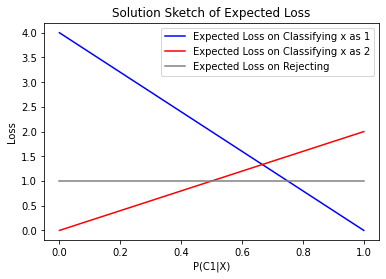

In [17]:
#use np.linspace to create an array to graph various probability values
prob = np.linspace(0,1,100)

#Define loss functions
c1_loss = 4-4*prob
c2_loss = 2*prob
reject_loss = np.ones(len(prob))

#Make a scatterplot
plt.plot(prob,c1_loss,color = 'blue', label = 'Expected Loss on Classifying x as 1')
plt.plot(prob,c2_loss,color = 'red', label = 'Expected Loss on Classifying x as 2')
plt.plot(prob,reject_loss,color = 'grey', label ='Expected Loss on Rejecting')
plt.title('Solution Sketch of Expected Loss')
plt.xlabel('P(C1|X)')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

In [1]:
import numpy as np

data = np.load('q2_data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

## Answer:

### a)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
result = model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [123]:
print("Precision, Recall, F1-score and Support on Train Data:\n")

print(classification_report(y_train, y_train_pred))

print("Precision, Recall, F1-score and Support on Test Data:\n")

print(classification_report(y_test, y_test_pred))

Precision, Recall, F1-score and Support on Train Data:

              precision    recall  f1-score   support

       False       0.71      1.00      0.83       214
        True       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

Precision, Recall, F1-score and Support on Test Data:

              precision    recall  f1-score   support

       False       0.69      1.00      0.82        69
        True       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

### b)

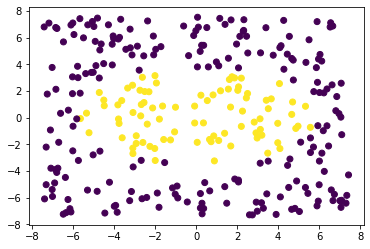

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1], c = y_train, label = y_train)

Thus, it can be seen that the seperation boundary in this case is not linear but eliptical. Logistic regression is used to classify data when a linear decision boundary is adequate. Since decision boundary is not linear in this case, we get poor results for metrics like accuracy, precision, recall etc in the pevious question.

### c)

Since the distribution is elliptical, we tranform the input variables in quadratic form since $b_0 + b_1x_1^2 + b_2x_2^2 = 0$ will give a linear boundary in this case

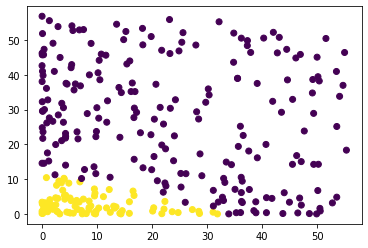

In [12]:
X_train_transformed = X_train**2
X_test_transformed = X_test**2
plt.scatter(X_train_transformed[:,0],X_train_transformed[:,1], c = y_train)

In [13]:
model2 = LogisticRegression()
result2 = model2.fit(X_train_transformed, y_train)

y_train_pred2 = model2.predict(X_train_transformed)
y_test_pred2 = model2.predict(X_test_transformed)

In [125]:
print("Precision, Recall, F1-score and Support on Train Data:\n")

print(classification_report(y_train, y_train_pred2))

print("Precision, Recall, F1-score and Support on Test Data:\n")

print(classification_report(y_test, y_test_pred2))

Precision, Recall, F1-score and Support on Train Data:

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       214
        True       0.99      0.99      0.99        86

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Precision, Recall, F1-score and Support on Test Data:

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        69
        True       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Thus, we can see that by the smart data transformation, we are getting high accuracy, precision and recall.

# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [228]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:


In Bayesian Network, any variable is conditionally independent of all non-descendent variables given its parents.

The general Bayesian model is: 

$$ P(A,B,C,D,E,F) = P(A)*P(B|A)*P(C|A,B)*P(D|A,B,C)*P(E|A,B,C,D)*P(F|A,B,C,D,E) $$

$$ P(A,B,C,D,E,F) = P(A)*P(B|A)*P(C|A,E)*P(D|B)*P(E|B)*P(F|C,D,E) $$





# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer:

### a)

In [276]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn import metrics

In [277]:
# Pima Diabetes dataset, for Section B only:

def load_diabetes():
    df = pd.read_csv('diabetes-2.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1, ))

X_diabetes, y_diabetes = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X_adult, y_adult = load_adult()

from sklearn.model_selection import train_test_split
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.33, random_state=42)

X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(X_adult, y_adult, test_size=0.33, random_state=42)

metrics_table_diabetes = pd.DataFrame(columns = ['Train', 'Test'], index = ['Random Forest', 'MLP', 'Logistic Regression'])
metrics_table_adult = pd.DataFrame(columns = ['Train', 'Test'], index = ['Random Forest', 'MLP', 'Logistic Regression'])

### Random Forest: 

In [278]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc1 = RandomForestClassifier(random_state=42)
rfc1.fit(X_diabetes_train, y_diabetes_train)

print("For diabetes dataset:")
print("The training accuracy is:", accuracy_score(y_diabetes_train, rfc1.predict(X_diabetes_train)))
print("The test accuracy is:", accuracy_score(y_diabetes_test, rfc1.predict(X_diabetes_test)))

metrics_table_diabetes.loc['Random Forest','Train'] = accuracy_score(y_diabetes_train, rfc1.predict(X_diabetes_train))
metrics_table_diabetes.loc['Random Forest','Test'] = accuracy_score(y_diabetes_test, rfc1.predict(X_diabetes_test))

rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(X_adult_train, y_adult_train)

print("For adult dataset:")
print("The training accuracy is:", accuracy_score(y_adult_train, rfc2.predict(X_adult_train)))
print("The test accuracy is:", accuracy_score(y_adult_test, rfc2.predict(X_adult_test)))


metrics_table_adult.loc['Random Forest','Train'] = accuracy_score(y_adult_train, rfc2.predict(X_adult_train))
metrics_table_adult.loc['Random Forest','Test'] = accuracy_score(y_adult_test, rfc2.predict(X_adult_test))


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


For diabetes dataset:
The training accuracy is: 1.0
The test accuracy is: 0.7519685039370079


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


For adult dataset:
The training accuracy is: 1.0
The test accuracy is: 0.8554811092499535


### MLP:

In [279]:
from sklearn.neural_network import MLPClassifier

mlp1 = MLPClassifier()
mlp1.fit(X_diabetes_train, y_diabetes_train)

print("For diabetes dataset:")
print("The training accuracy is:", accuracy_score(y_diabetes_train, mlp1.predict(X_diabetes_train)))
print("The test accuracy is:", accuracy_score(y_diabetes_test, mlp1.predict(X_diabetes_test)))

metrics_table_diabetes.loc['MLP','Train'] = accuracy_score(y_diabetes_train, mlp1.predict(X_diabetes_train))
metrics_table_diabetes.loc['MLP','Test'] = accuracy_score(y_diabetes_test, mlp1.predict(X_diabetes_test))


mlp2 = MLPClassifier()
mlp2.fit(X_adult_train, y_adult_train)

print("For adult dataset:")
print("The training accuracy is:", accuracy_score(y_adult_train, mlp2.predict(X_adult_train)))
print("The test accuracy is:", accuracy_score(y_adult_test, mlp2.predict(X_adult_test)))

metrics_table_adult.loc['MLP','Train'] = accuracy_score(y_adult_train, mlp2.predict(X_adult_train))
metrics_table_adult.loc['MLP','Test'] = accuracy_score(y_adult_test, mlp2.predict(X_adult_test))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For diabetes dataset:
The training accuracy is: 0.7957198443579766
The test accuracy is: 0.7007874015748031
For adult dataset:
The training accuracy is: 0.7807013522805409
The test accuracy is: 0.788107202680067


### Logistic Regression:

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model1 = LogisticRegression()
result1 = model1.fit(X_diabetes_train, y_diabetes_train)

print("For diabetes dataset:")
print("The training accuracy is:", accuracy_score(y_diabetes_train, model1.predict(X_diabetes_train)))
print("The test accuracy is:", accuracy_score(y_diabetes_test, model1.predict(X_diabetes_test)))

metrics_table_diabetes.loc['Logistic Regression','Train'] = accuracy_score(y_diabetes_train, model1.predict(X_diabetes_train))
metrics_table_diabetes.loc['Logistic Regression','Test'] = accuracy_score(y_diabetes_test, model1.predict(X_diabetes_test))


model2 = LogisticRegression()
result2 = model2.fit(X_adult_train, y_adult_train)

print("For adult dataset:")
print("The training accuracy is:", accuracy_score(y_adult_train, model2.predict(X_adult_train)))
print("The test accuracy is:", accuracy_score(y_adult_test, model2.predict(X_adult_test)))


metrics_table_adult.loc['Logistic Regression','Train'] = accuracy_score(y_adult_train, model2.predict(X_adult_train))
metrics_table_adult.loc['Logistic Regression','Test'] = accuracy_score(y_adult_test, model2.predict(X_adult_test))



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

For diabetes dataset:
The training accuracy is: 0.7801556420233463
The test accuracy is: 0.7480314960629921
For adult dataset:
The training accuracy is: 0.799679119871648
The test accuracy is: 0.8052298529685464


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [281]:
print('For Diabetes dataset, accuracies are:')
metrics_table_diabetes

For Diabetes dataset, accuracies are:


,Train,Test
Random Forest,1,0.751969
MLP,0.79572,0.700787
Logistic Regression,0.780156,0.748031


In [282]:
print('For Adult dataset, accuracies are:')
metrics_table_adult

For Adult dataset, accuracies are:


,Train,Test
Random Forest,1,0.855481
MLP,0.780701,0.788107
Logistic Regression,0.799679,0.80523


### b)

In [283]:
from sklearn.calibration import CalibrationDisplay

# Create classifiers

clf_list1 = [
    (model1, "Logistic Regression"),
    (rfc1, "Random forest"),
    (mlp1, "Multilayer Perceptron")]


clf_list2 = [
    (model2, "Logistic Regression"),
    (rfc2, "Random forest"),
    (mlp2, "Multilayer Perceptron")]

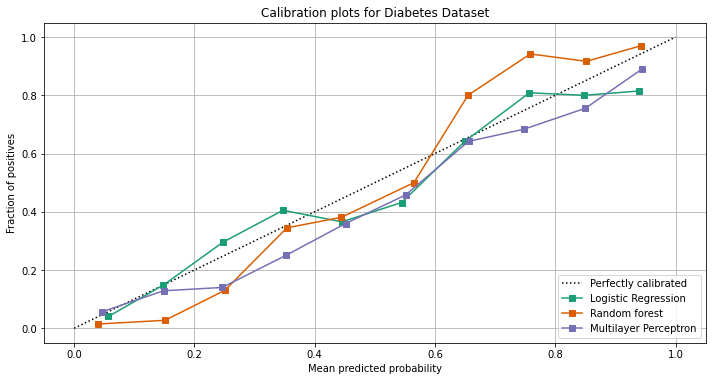

In [284]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list1):
    #clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_diabetes,
        y_diabetes,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots for Diabetes Dataset")

# Add histogram
# grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
# for i, (_, name) in enumerate(clf_list):
#     row, col = grid_positions[i]
#     ax = fig.add_subplot(gs[row, col])

#     ax.hist(
#         calibration_displays[name].y_prob,
#         range=(0, 1),
#         bins=10,
#         label=name,
#         color=colors(i),
#     )
#     ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Calibration plots for Adult Dataset')

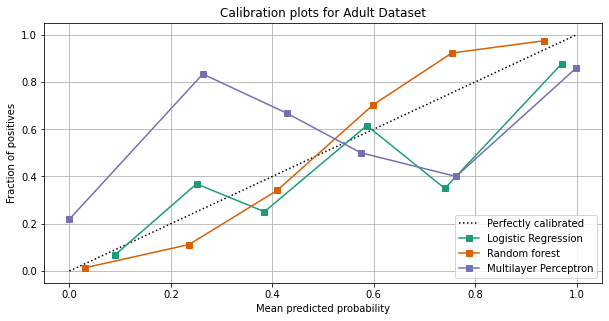

In [309]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list2):
    #clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_adult,
        y_adult,
        n_bins=6,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots for Adult Dataset")


### c)

### DiCE (random)

In [286]:
# import DiCE
import dice_ml
from dice_ml.utils import helpers  # helper functions

In [287]:
def generateCF(model, method, X, y, sample_size, n_cfs, cont_features, cat_features):
    dataset = X.copy()
    dataset['outcome'] = y
    d = dice_ml.Data(dataframe=dataset, continuous_features=cont_features, categorical_features=cat_features, outcome_name='outcome')
    
    # provide the trained ML model to DiCE's model object
    backend = 'sklearn'
    m = dice_ml.Model(model=model, backend=backend)
    
    # initiate DiCE
    exp = dice_ml.Dice(d, m, method=method)
    
    query_instances = X[:sample_size]
    
    # generate counterfactuals
    dice_exp = exp.generate_counterfactuals(
        query_instances, total_CFs=n_cfs, desired_class="opposite", verbose=False)
    
    return dice_exp, dataset.head(sample_size)

In [288]:
diabetes_cont_features = list(X_diabetes.columns)
diabetes_cat_features = None


adults_cat_features = ['capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Male']

#adults_cat_features = None
adults_cont_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [289]:
def generateContProximity(cfs, dataset, sample_size, n_cfs, c_features):
    dist_outer = []
    for i in range(sample_size):
        p1 = dataset[c_features].iloc[i].values
        out_array = cfs.cf_examples_list[i].final_cfs_df[c_features].values.T
        temp = np.array([np.abs(c-p1) for c in out_array.T])
        dist = (temp @ temp.T) @ np.ones(n_cfs)
        
        dist = np.dot(temp, out_array)
        dist_outer.append(-np.mean(np.sqrt(dist)))
    return np.mean(dist_outer)


def generateValidity(cfs, sample_size):
    r_outer = []
    for i in range(sample_size):
        unique_cfs = len(set(map(str, cfs.cf_examples_list[i].final_cfs_df.values)))
        
        r_outer.append(float(unique_cfs) / sample_size) 
    return np.mean(r_outer)


def generateSparcity(cfs, dataset, sample_size, n_cfs):
    
    dist_outer = []
    for i in range(sample_size):
        p1 = dataset.iloc[i].values
        out_array = cfs.cf_examples_list[i].final_cfs_df.values.T
        
        temp = sum([sum(np.abs(c-p1)>0) for c in out_array.T])
        temp = float(temp) / n_cfs / dataset.shape[1]
        dist_outer.append(1 - temp)
    return np.mean(dist_outer)

def generateDiversity(cfs, sample_size, n_cfs):
    dist_outer = []
    for i in range(sample_size):
        out_array = cfs.cf_examples_list[i].final_cfs_df.values.T
        dist = 0
        for c in out_array.T:
            temp = np.array([np.abs(q-c) for q in out_array.T])
            dist += sum((temp @ temp.T) @ np.ones(5)) / (c.T @ c)
        
        dist = float(dist) / n_cfs
        dist_outer.append(dist)

    return np.mean(dist_outer)

def get_mmd_rbf(cfs, dataset, sample_size, gamma=1.0):
    
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    
    XX_list = []
    YY_list = []
    XY_list = []
    
    for i in range(sample_size):
        X = dataset.iloc[i].values.reshape(-1, 1).T
        Y = cfs.cf_examples_list[i].final_cfs_df.values
        XX = metrics.pairwise.rbf_kernel(X, X, gamma)
        YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
        XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
        
        XX_list.append(XX)
        YY_list.append(YY)
        XY_list.append(XY)
        
    return np.mean(XX_list) + np.mean(YY_list) - 2 * np.mean(XY_list)


In [290]:
clf_dict = {
    'Diabetes Dataset' : {
        'Logistic Regression' : model1,
        'MLP' : mlp1,
        'Random Forest' : rfc1
    },
    'Adult Dataset' : {
        'Logistic Regression' : model2,
        'MLP' : mlp2,
        'Random Forest' : rfc2
    }
    
}

clf_data = {
    'Diabetes Dataset' : {
        'X_test' : X_diabetes_test,
        'y_test' : y_diabetes_test,
        'cont_features' : diabetes_cont_features,
        'cat_features' : diabetes_cat_features
    },
    'Adult Dataset' : {
        'X_test' : X_adult_test,
        'y_test' : y_adult_test,
        'cont_features' : adults_cont_features,
        'cat_features' : adults_cat_features
    }, 
    
}

sample_size = 15
n_cfs = 5 
cf_metric = defaultdict(dict)

for k in clf_dict.keys():
    print('Generating counterfactuals for', k)
    for name, model in clf_dict[k].items():
        print('Model Name: ', name)
        for method in ['random']:
            print('Method Name: ', method)
            
            X = clf_data[k]['X_test']
            y = clf_data[k]['y_test']
            cont_features = clf_data[k]['cont_features']
            cat_features = clf_data[k]['cat_features']
            
            cfs, dataset = generateCF(model=model,
                                      method=method, 
                                      X=X, 
                                      y=y, 
                                      sample_size=sample_size, 
                                      n_cfs=n_cfs,
                                      cont_features=cont_features,
                                      cat_features=cat_features)
            
        

                
            proximity = generateContProximity(cfs, dataset, sample_size, n_cfs, cont_features)

            validity = generateValidity(cfs, sample_size)
            sparcity = generateSparcity(cfs, dataset, sample_size, n_cfs)
            diversity = generateDiversity(cfs, sample_size, n_cfs)
            mmd = get_mmd_rbf(cfs, dataset, sample_size)
            print(mmd)
                
            cf_metric_key = '~'.join([k, method, name])
                    
            if cf_metric_key not in cf_metric:
                    cf_metric[cf_metric_key] = {
                        'proximity' : proximity,
                        'validity' : validity,
                        'sparcity' : sparcity,
                        'diversity' : diversity,
                        'mmd' : mmd
                    }
        
    

  7%|▋         | 1/15 [00:00<00:01,  8.00it/s]

Generating counterfactuals for Diabetes Dataset
Model Name:  Logistic Regression
Method Name:  random


  7%|▋         | 1/15 [00:00<00:01,  8.10it/s]

1.205332974303131
Model Name:  MLP
Method Name:  random


  0%|          | 0/15 [00:00<?, ?it/s]

1.2026636955116257
Model Name:  Random Forest
Method Name:  random


100%|██████████| 15/15 [00:07<00:00,  1.94it/s]


1.1974615160126876
Generating counterfactuals for Adult Dataset
Model Name:  Logistic Regression
Method Name:  random


100%|██████████| 15/15 [00:03<00:00,  4.05it/s]


1.2072437862699785
Model Name:  MLP
Method Name:  random


100%|██████████| 15/15 [00:03<00:00,  4.46it/s]


1.200315106486186
Model Name:  Random Forest
Method Name:  random


100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

1.1872679490073865


In [291]:
df = pd.DataFrame.from_dict(cf_metric, orient='index').reset_index()
index_split = df['index'].str.split('~', expand=True)
df['Dataset'] = index_split[0]
df['Model'] = index_split[2]
df.drop('index', inplace = True, axis = 1)

df = df[['Dataset', 'Model', 'proximity', 'validity', 'sparcity', 'diversity', 'mmd']]
df.sort_values(by=['Dataset'], ascending=False)

,Dataset,Model,proximity,validity,sparcity,diversity,mmd
0,Diabetes Dataset,Logistic Regression,-65.730465,0.333333,0.752593,3.506712,1.205333
1,Diabetes Dataset,MLP,-99.667482,0.333333,0.758519,16.524139,1.202664
2,Diabetes Dataset,Random Forest,-87.595032,0.333333,0.746667,4.614842,1.197462
3,Adult Dataset,Logistic Regression,-17350.604382,0.333333,0.961592,1.313031,1.207244
4,Adult Dataset,MLP,-82199.374247,0.333333,0.967562,21.557716,1.200315
5,Adult Dataset,Random Forest,-64624.271503,0.333333,0.962985,58.342425,1.187268


### DiCE (genetic)

In [297]:
clf_dict = {
    'Diabetes Dataset' : {
        'Logistic Regression' : model1,
        'MLP' : mlp1,
        'Random Forest' : rfc1
    }
    
}

clf_data = {
    'Diabetes Dataset' : {
        'X_test' : X_diabetes_test,
        'y_test' : y_diabetes_test,
        'cont_features' : diabetes_cont_features,
        'cat_features' : diabetes_cat_features
    },

    
}

In [298]:
sample_size = 15
n_cfs = 5 
cf_metric = defaultdict(dict)

for k in clf_dict.keys():
    print('Generating counterfactuals for', k)
    for name, model in clf_dict[k].items():
        print('Model Name: ', name)
        for method in ['genetic']:
            print('Method Name: ', method)
            
            X = clf_data[k]['X_test']
            y = clf_data[k]['y_test']
            cont_features = clf_data[k]['cont_features']
            cat_features = clf_data[k]['cat_features']
            
            cfs, dataset = generateCF(model=model,
                                      method=method, 
                                      X=X, 
                                      y=y, 
                                      sample_size=sample_size, 
                                      n_cfs=n_cfs,
                                      cont_features=cont_features,
                                      cat_features=cat_features)
            
          
                

                
            proximity = generateContProximity(cfs, dataset, sample_size, n_cfs, cont_features)

            validity = generateValidity(cfs, sample_size)
            sparcity = generateSparcity(cfs, dataset, sample_size, n_cfs)
            diversity = generateDiversity(cfs, sample_size, n_cfs)
            mmd = get_mmd_rbf(cfs, dataset, sample_size)
            print(mmd)
                
            cf_metric_key = '~'.join([k, method, name])
                    
            if cf_metric_key not in cf_metric:
                    cf_metric[cf_metric_key] = {
                        'proximity' : proximity,
                        'validity' : validity,
                        'sparcity' : sparcity,
                        'diversity' : diversity,
                        'mmd' : mmd }
                    
    
    

  7%|▋         | 1/15 [00:00<00:02,  5.75it/s]

Generating counterfactuals for Diabetes Dataset
Model Name:  Logistic Regression
Method Name:  genetic


  7%|▋         | 1/15 [00:00<00:02,  6.91it/s]

1.150949408443964
Model Name:  MLP
Method Name:  genetic


  0%|          | 0/15 [00:00<?, ?it/s]

1.1231052008691766
Model Name:  Random Forest
Method Name:  genetic


100%|██████████| 15/15 [00:05<00:00,  2.54it/s]

1.1592599560160397


In [299]:
df = pd.DataFrame.from_dict(cf_metric, orient='index').reset_index()
index_split = df['index'].str.split('~', expand=True)
df['Dataset'] = index_split[0]
df['Model'] = index_split[2]
df.drop('index', inplace = True, axis = 1)

df = df[['Dataset', 'Model', 'proximity', 'validity', 'sparcity', 'diversity', 'mmd']]
df.sort_values(by=['Dataset'], ascending=False)

,Dataset,Model,proximity,validity,sparcity,diversity,mmd
0,Diabetes Dataset,Logistic Regression,-98.514003,0.333333,0.254815,3.340513,1.150949
1,Diabetes Dataset,MLP,-83.108611,0.333333,0.294815,10.464143,1.123105
2,Diabetes Dataset,Random Forest,-93.160766,0.333333,0.266667,3.260738,1.159260
